In [11]:
import cv2
import matplotlib.pyplot as plt
import os

# Tạo thư mục lưu ảnh nếu chưa có
output_dir = "E:/IAMMMM/dem0_processed_data"
os.makedirs(output_dir, exist_ok=True)

# 1. Đọc ảnh gốc
image_path = "E:/data/000/a01-000u.png"  # Thay bằng đường dẫn ảnh của bạn
original = cv2.imread(image_path)

if original is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh tại {image_path}")

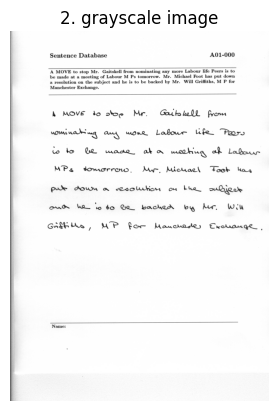

True

In [12]:
# 2. Chuyển grayscale
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

# Hiển thị và lưu ảnh grayscale
plt.imshow(gray, cmap='gray')
plt.title("2. grayscale image")
plt.axis('off')
plt.show()
cv2.imwrite(f"{output_dir}/2_grayscale.png", gray)

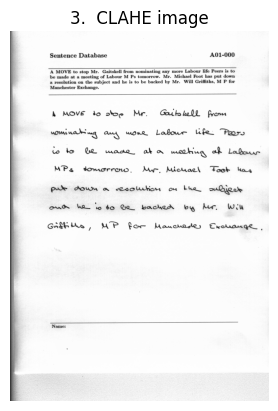

True

In [13]:
# 3. Cân bằng sáng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

# Hiển thị và lưu ảnh sau CLAHE
plt.imshow(clahe_img, cmap='gray')
plt.title("3.  CLAHE image")
plt.axis('off')
plt.show()
cv2.imwrite(f"{output_dir}/3_clahe.png", clahe_img)

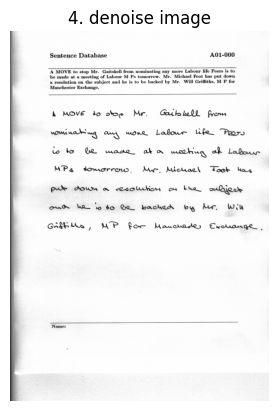

True

In [14]:
# 4. Lọc nhiễu Median
denoised = cv2.medianBlur(clahe_img, 3)

# Hiển thị và lưu ảnh đã lọc nhiễu
plt.imshow(denoised, cmap='gray')
plt.title("4. denoise image")
plt.axis('off')
plt.show()
cv2.imwrite(f"{output_dir}/4_denoised.png", denoised)

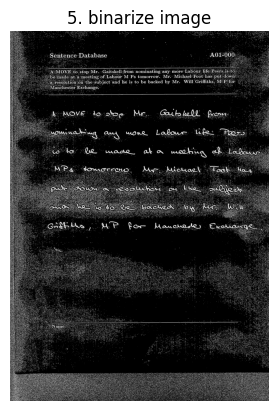

True

In [15]:
# 5. Binarization
binary = cv2.adaptiveThreshold(denoised, 255, 
                             cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY_INV, 11, 2)

# Hiển thị và lưu ảnh nhị phân cuối cùng
plt.imshow(binary, cmap='gray')
plt.title("5. binarize image")
plt.axis('off')
plt.show()
cv2.imwrite(f"{output_dir}/5_binary.png", binary)